<a href="https://colab.research.google.com/github/NohYeonggwon/rlrPgkrtmq42/blob/main/201835649_%EB%85%B8%EC%98%81%EA%B6%8C_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1
**과제 1.**

타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

---

* 기본값으로 모델을 생성하고, 최적화를 진행할 것.

* random_state는 201835649로 설정.

입력 데이터도 적절히 수정할 것.

* NaN(Not A Number) 값을 어떻게 처리했는가?

* 왜 이렇게 훈련 및 테스트 세트를 만들었는가?

수행한 최적화 방법을 단계별로 자세히 설명할 것.

* 왜 이런 파리미터를 수정하는가?

* 왜 이렇게 파라미터 범위를 정했는가?

* 왜 이런 파라미터를 최종적으로 선택했는가?

* 위에 언급한 것 말고도 다양한 방법을 사용해 볼 것.

* 모델을 만들고 난 후에도 필요하면 입력 데이터를 수정하여 다시 모델을 만들 수 있음.

* 특성 공학 이용

**주의!!!**

다운받은 파일 수정 금지 및 모든 데이터 사용할 것.

그러나 변수로 지정된 데이터는 수정가능.

파일 /content/drive/MyDrive/Colab Notebooks/에 업로드하여 사용할 것.

* 예) titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")


10/15일까지 자신의 GitHub에 업로드할 것.

---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data

In [ ]:
import numpy as np
import pandas as pd
import os

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 자료구조 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 각 칼럼과 생존간의 관계 파악

In [ ]:
# Pclass(좌석 등급)

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


어중간한 관계를 보임

In [ ]:
# Sex(성별)

train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


확실한 관계를 보임

In [ ]:
# SibSp(형제, 배우자)

train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


애매한 관계를 보임

In [ ]:
# Parch(부모, 자식)

train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


관계 없음

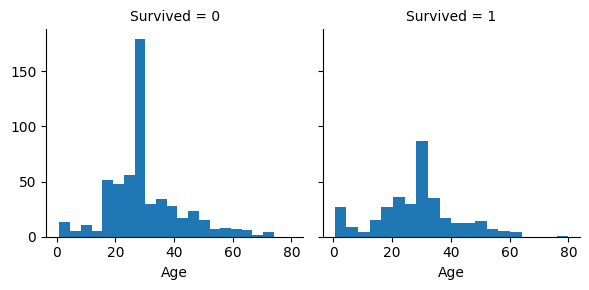

In [ ]:
# Age(나이)

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)


   생존 및 희생자의 분포가 유사하므로 관계는 없어보임

In [ ]:
# 필요없는 필드 삭제
train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'Parch', 'SibSp', 'Embarked', 'Fare', 'PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name', 'Parch', 'SibSp', 'Embarked', 'Fare'], axis=1)

In [ ]:
# train_df, test_df 결합

combine = [train_df, test_df]

In [ ]:
# 성별 인코딩

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [ ]:
# 나이 분류

for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,1.0
1,1,1,1,2.0
2,1,3,1,1.0
3,1,1,1,2.0
4,0,3,0,2.0


In [ ]:
# 결측값 채우기(나이)

for dataset in combine:
    dataset["Age"] = dataset.groupby(dataset.Pclass).Age.transform(lambda x: x.fillna(x.median()))

## 데이터 분류 하고 모델 만들고 최적화

In [ ]:
# 학습, 테스트 데이터 분류

X_train = train_df.drop(["Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.copy().drop("PassengerId", axis=1)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier(random_state=201835649)
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

75.31

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=201835649)
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

80.81

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=201835649)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

80.81

In [ ]:
# HistGradientBoosting

hist_gb_clf = HistGradientBoostingClassifier(random_state=201835649 )
hist_gb_clf.fit(X_train, Y_train)
hist_gb_clf.score(X_train, Y_train)
acc_hist_gb_clf = round(hist_gb_clf.score(X_train, Y_train) * 100, 2)
acc_hist_gb_clf

80.58